# 1. Set up

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [1]:
import pandas as pd
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")
df = pd.concat((X_train,y_train), axis =1)
df.shape

(2344, 82)

In [ ]:
train = pd.concat((X_train,y_train),axis=1)

# 2. Neighborhood analysis

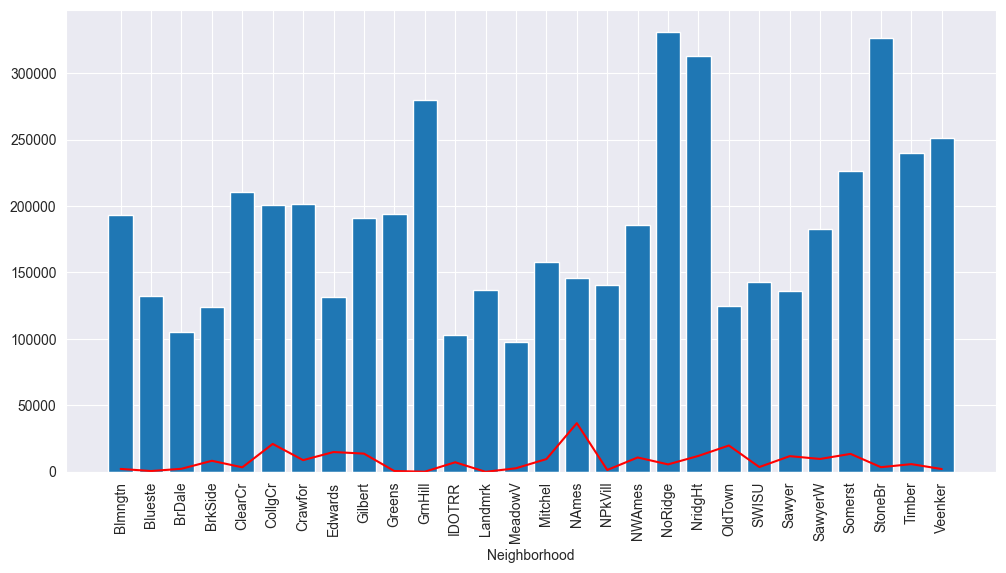

In [4]:
plt.figure(figsize=(12,6))
train_fig = train[["Neighborhood", "SalePrice"]].groupby(by="Neighborhood").agg(["mean","size"])
plt.bar(train_fig.index, train_fig["SalePrice"]["mean"])
plt.plot(train_fig.index, train_fig["SalePrice"]["size"]*100,c="red")
plt.xlabel("Neighborhood")
plt.tick_params(axis='x',labelrotation=90.0)
plt.show()

In [5]:
maping = {'Blmngtn':2, 'Blueste':1, 'BrDale':0, 'BrkSide':1, 'ClearCr':2, 'CollgCr':2,
       'Crawfor':2, 'Edwards':1, 'Gilbert':2, 'Greens':2, 'GrnHill':3, 'IDOTRR':0,
       'Landmrk':1, 'MeadowV':0, 'Mitchel':1, 'NAmes':1, 'NPkVill':1, 'NWAmes':2,
       'NoRidge':3, 'NridgHt':3, 'OldTown':1, 'SWISU':1, 'Sawyer':1, 'SawyerW':2,
       'Somerst':2, 'StoneBr':3, 'Timber':2, 'Veenker':2}

In [6]:
train["neig_map_num"] = train.Neighborhood.map(maping)

In [ ]:
train.columns

Index(['Year Built', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Garage Area', 'Overall Qual', 'Full Bath', 'Exter Qual',
       'Kitchen Qual', 'Neighborhood', 'SalePrice', 'neig_map_num'],
      dtype='object')

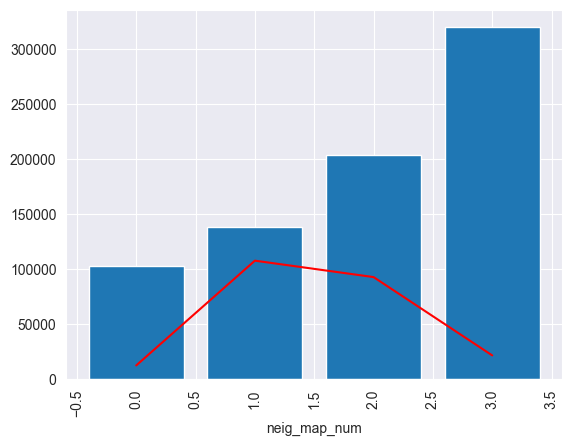

In [7]:
plt.figure()
train_fig = train[["neig_map_num", "SalePrice"]].groupby(by="neig_map_num").agg(["mean","size"])
plt.bar(train_fig.index, train_fig["SalePrice"]["mean"])
plt.plot(train_fig.index, train_fig["SalePrice"]["size"]*100,c="red")
plt.xlabel("neig_map_num")
plt.tick_params(axis='x',labelrotation=90.0)
plt.show()

In [ ]:
train_fig["SalePrice"]["size"]

neig_map_num
0     125
1    1076
2     927
3     216
Name: size, dtype: int64

# 3. Test de l'hypothèse

In [8]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")

In [10]:
X_train["neig_map_num"] = X_train.Neighborhood.map(maping)
X_test["neig_map_num"] = X_test.Neighborhood.map(maping)

cat_feature = ["neig_map_num"]

In [11]:
import utils

utils.regression(X_train=X_train, X_test=X_test, cat_feature=cat_feature)

MAE on train data:  21112.821603761997
MAE on test data:  22127.856612706226


(21112.821603761997, 22127.856612706226)

Conlusion: on ne voit pas d'amélioration